# online machine learning lecture

#### 1- offline learning:
Train all dataset toghether (what we have been doing so far)

#### 2- online learning:
feed data in sequential order and not train them all toghether. so we will add them 1 by 1 to our model.
this method is very good for time series analysis specially stock data and also good for having control on
patients and updating our model base on real-time data!

##### 1. update data with each data point
##### 2. good for time-series and things that need to be checked continuously
##### 3. working with river library
##### 4. poor resource for deep learning!

## classification

In [ ]:
!pip install -U river pandas numpy matplotlib tensorflow plotly seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 45.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from river import multiclass
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
# download and read data as a dataframe
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data["target"].replace({0.0: "Iris-setosa",
                        1.0: "Iris-versicolor",
                        2.0: "Iris-virginica"}, inplace=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


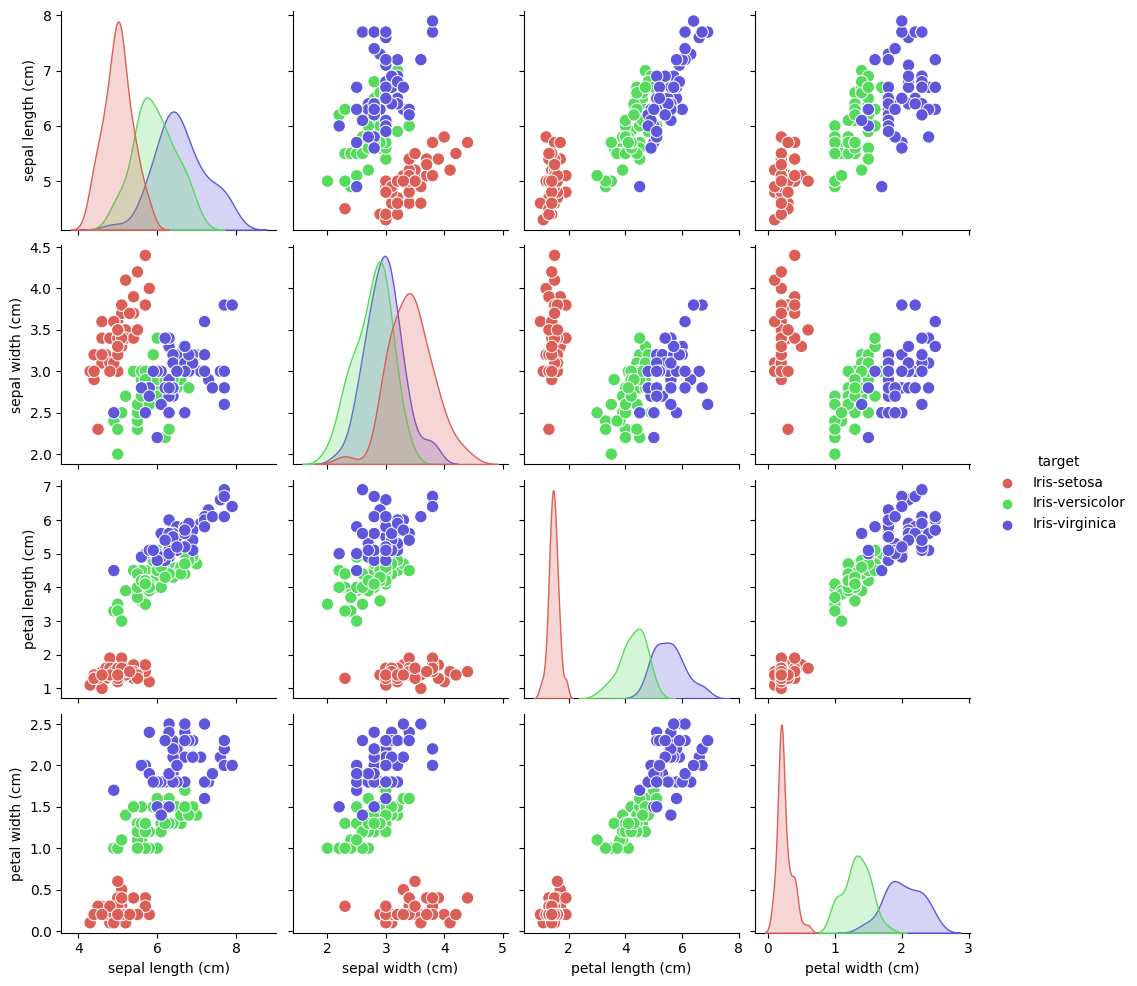

In [ ]:
sns.pairplot(data=data,
             hue="target",
             palette="hls",
             plot_kws={"s": 80})

In [ ]:
data['setosa'] = data['target'] == 'Iris-setosa'
data['setosa']


0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: setosa, Length: 150, dtype: bool

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,True
1,4.9,3.0,1.4,0.2,Iris-setosa,True
2,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4.6,3.1,1.5,0.2,Iris-setosa,True
4,5.0,3.6,1.4,0.2,Iris-setosa,True


In [ ]:
data.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa
9,4.9,3.1,1.5,0.1,Iris-setosa,True
48,5.3,3.7,1.5,0.2,Iris-setosa,True
44,5.1,3.8,1.9,0.4,Iris-setosa,True


In [ ]:
# convert to streaming dataset
for i, row in data.sample(1).iterrows():
    print(i)
    print(row)

    X = row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
    X = X.to_dict()

    y = row['setosa']

    print(X)
    print(y)
    break

133
sepal length (cm)               6.3
sepal width (cm)                2.8
petal length (cm)               5.1
petal width (cm)                1.5
target               Iris-virginica
setosa                        False
Name: 133, dtype: object
{'sepal length (cm)': 6.3, 'sepal width (cm)': 2.8, 'petal length (cm)': 5.1, 'petal width (cm)': 1.5}
False


In [ ]:
lr = linear_model.LogisticRegression()

for i,row in data.sample(frac=1).iterrows():
    X = row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
    X = X.to_dict()
    y = row['setosa']

    lr.learn_one(X, y)


In [ ]:
preds = lr.predict_many(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
print(preds)

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [ ]:
accuracy_score(data['setosa'], preds)

1.0

In [ ]:
train, test = train_test_split(data, stratify = data['setosa'])
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa
123,6.3,2.7,4.9,1.8,Iris-virginica,False
140,6.7,3.1,5.6,2.4,Iris-virginica,False
120,6.9,3.2,5.7,2.3,Iris-virginica,False
2,4.7,3.2,1.3,0.2,Iris-setosa,True
110,6.5,3.2,5.1,2.0,Iris-virginica,False
...,...,...,...,...,...,...
104,6.5,3.0,5.8,2.2,Iris-virginica,False
106,4.9,2.5,4.5,1.7,Iris-virginica,False
54,6.5,2.8,4.6,1.5,Iris-versicolor,False
117,7.7,3.8,6.7,2.2,Iris-virginica,False


In [ ]:
from river import linear_model,metrics

model =  linear_model.LogisticRegression()
correct = []

for i,row in train.sample(frac=1).iterrows():
    X = row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
    X = X.to_dict()

    y = row['setosa']

    model.predict_one(X)
    correct.append(y == model.predict_one(X))

    model.learn_one(X,y)

In [ ]:
a = np.array([1, 2, 3, 4, 5])
a.cumsum()

array([ 1,  3,  6, 10, 15])

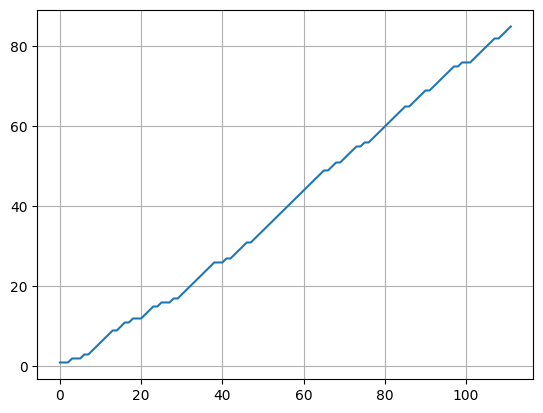

In [ ]:
plt.plot(np.cumsum(correct))
plt.grid()
plt.show()

In [ ]:
accuracy_score(test['setosa'],model.predict_many(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]))

1.0

In [ ]:
train,test = train_test_split(data, stratify =data['target'])

In [ ]:
model =  multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
correct = []

for i,row in train.sample(frac=1).iterrows():
    X = row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
    X = X.to_dict()

    y = row['target']

    model.predict_one(X)
    correct.append(y == model.predict_one(X))

    model.learn_one(X,y)

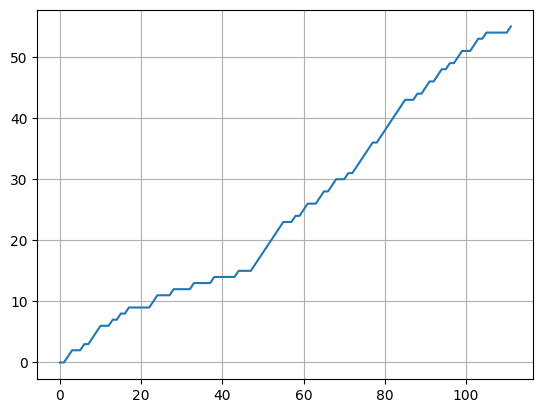

In [ ]:
plt.plot(np.cumsum(correct))
plt.grid()
plt.show()

In [ ]:
model.predict_many(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])


27        Iris-setosa
133    Iris-virginica
71     Iris-virginica
113    Iris-virginica
72     Iris-virginica
58     Iris-virginica
89     Iris-virginica
11        Iris-setosa
96     Iris-virginica
49        Iris-setosa
67     Iris-virginica
118    Iris-virginica
29        Iris-setosa
130    Iris-virginica
25        Iris-setosa
70     Iris-virginica
14        Iris-setosa
26        Iris-setosa
44        Iris-setosa
102    Iris-virginica
95     Iris-virginica
69     Iris-virginica
65     Iris-virginica
53     Iris-virginica
30        Iris-setosa
61     Iris-virginica
20        Iris-setosa
32        Iris-setosa
132    Iris-virginica
121    Iris-virginica
144    Iris-virginica
8         Iris-setosa
45        Iris-setosa
134    Iris-virginica
93     Iris-virginica
90     Iris-virginica
50     Iris-virginica
149    Iris-virginica
dtype: object

In [ ]:
accuracy_score(test['target'], model.predict_many(test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]))

0.6052631578947368

In [ ]:
model = compose.Pipeline(
     preprocessing.StandardScaler(),
     multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
     )

metric = metrics.Accuracy()

for i,row in train.sample(frac=1).iterrows():
  X = row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
  X = X.to_dict()

  y = row['target']
  y_pred = model.predict_one(X)      # make a prediction
  metric = metric.update(y, y_pred)  # update the metric
  model = model.learn_one(X, y)      # make the model learn
  print(metric)

Accuracy: 0.00%
Accuracy: 50.00%
Accuracy: 66.67%
Accuracy: 75.00%
Accuracy: 60.00%
Accuracy: 50.00%
Accuracy: 57.14%
Accuracy: 62.50%
Accuracy: 66.67%
Accuracy: 70.00%
Accuracy: 72.73%
Accuracy: 75.00%
Accuracy: 69.23%
Accuracy: 64.29%
Accuracy: 66.67%
Accuracy: 68.75%
Accuracy: 64.71%
Accuracy: 66.67%
Accuracy: 63.16%
Accuracy: 65.00%
Accuracy: 66.67%
Accuracy: 68.18%
Accuracy: 69.57%
Accuracy: 70.83%
Accuracy: 72.00%
Accuracy: 73.08%
Accuracy: 74.07%
Accuracy: 71.43%
Accuracy: 68.97%
Accuracy: 66.67%
Accuracy: 67.74%
Accuracy: 68.75%
Accuracy: 69.70%
Accuracy: 70.59%
Accuracy: 68.57%
Accuracy: 69.44%
Accuracy: 70.27%
Accuracy: 68.42%
Accuracy: 66.67%
Accuracy: 67.50%
Accuracy: 68.29%
Accuracy: 69.05%
Accuracy: 69.77%
Accuracy: 70.45%
Accuracy: 68.89%
Accuracy: 69.57%
Accuracy: 68.09%
Accuracy: 68.75%
Accuracy: 69.39%
Accuracy: 68.00%
Accuracy: 68.63%
Accuracy: 67.31%
Accuracy: 67.92%
Accuracy: 68.52%
Accuracy: 69.09%
Accuracy: 69.64%
Accuracy: 70.18%
Accuracy: 70.69%
Accuracy: 69.49

# stock market forecasting with lstm

In [ ]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Model

In [ ]:
data = yf.download("BTC-USD", start=dt.datetime(2014, 1, 1))
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.drop(["Adj Close"], axis=1, inplace=True)
# data = data.drop(["Adj Close"], axis=1)


In [ ]:
data.rename({"Open": "open",
             "Close": "close",
             "High": "high",
             "Low": "low",}, axis=1, inplace=True)

In [ ]:
data

,open,high,low,close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-06-17,26328.679688,26769.394531,26174.492188,26510.675781,11090276850
2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,9565695129
2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,12826986222


In [ ]:
fig_main = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03,
                         subplot_titles=["Bitcoin price", "Volume"], row_width=[0.2, 0.7])

fig_main.layout.template = "plotly_dark"

fig_main.add_trace(go.Candlestick(
    x = data.index,
    open = data.open,
    high = data.high,
    low = data.low,
    close = data.close,
    name="Bitcoin price",
    showlegend=False
), row=1, col=1)

fig_main.add_trace(go.Bar(x=data.index,
                          y=data["Volume"],
                          name="Volume",
                          showlegend=False),
                          row=2, col=1)

fig_main.update_layout(width=1200, height=800)

In [ ]:
a = pd.DataFrame([1, 2, 3, 4])
a.expanding(axis=0).mean()

,0
0,1.0
1,1.5
2,2.0
3,2.5


In [ ]:
mean, std = data.expanding(axis=0).mean(), data.expanding(axis=0).std()
data_normalized = (data - mean) / std
data_normalized.dropna(inplace=True)
data_normalized

,open,high,low,close,Volume
Date,,,,,
2014-09-18,-0.707107,-0.707107,-0.707107,-0.707107,0.707107
2014-09-19,-1.130214,-1.111206,-0.943307,-0.982235,0.759339
2014-09-20,-1.251157,-0.946979,-0.650770,-0.464051,0.547952
2014-09-21,-0.711071,-1.068948,-0.483801,-0.711470,-0.659294
2014-09-22,-0.850182,-1.042714,-0.314543,-0.522460,-0.844849
...,...,...,...,...,...
2023-06-17,0.801037,0.788076,0.838335,0.812144,-0.280390
2023-06-18,0.812177,0.782185,0.847842,0.801041,-0.358196
2023-06-19,0.801042,0.800785,0.846775,0.832978,-0.191569


In [ ]:
data_normalized.dropna(inplace=True)


In [ ]:
train = data_normalized.iloc[:int(len(data_normalized) * 0.6)]
test = data_normalized.iloc[int(len(data_normalized) * 0.6):int(len(data_normalized) * 0.8)]
validation = data_normalized.iloc[int(len(data_normalized) * 0.8):]

In [ ]:
print(f"length of train is {len(train)}")
print(f"length of test is {len(test)}")
print(f"length of validation is {len(validation)}")

length of train is 1919
length of test is 637
length of validation is 640


In [ ]:
class StreamingData:
    def __init__(self, train: pd.DataFrame, test: pd.DataFrame, validation: pd.DataFrame, n: int):
        self.train = train
        self.test = test
        self.validation = validation
        self.n = n

    def add_sample(self):
        for i in range(self.n):
            self.train = self.train.to_numpy()
            self.train = np.concatenate([self.train, self.test.iloc[i].to_numpy().reshape(-1, 5)], axis=0)
            self.train = pd.DataFrame(self.train)
            self.test.drop(self.test.index[i], inplace=True)

        return self.train, self.test, self.validation

    def generate_sequences(self, data: pd.DataFrame, window_size: int):
        X = []
        y = []

        data = data.to_numpy()
        for i in range(len(data) - window_size):
            X.append(data[i:i+window_size])
            y.append(data[i+window_size, 3])

        X = np.array(X)
        y = np.array(y)
        return X, y

    def __call__(self):
        self.train, self.test, self.validation = self.add_sample()
        xtrain, ytrain = self.generate_sequences(self.train, 30)
        xvalid, yvalid = self.generate_sequences(self.validation, 30)
        return (xtrain, ytrain), (xvalid, yvalid)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

st = StreamingData(train, test, validation, 1)
# train, test, validation = st.add_sample()
(xtrain, ytrain), (xtest, ytest) = st()

In [ ]:
print(f"xtrain shape is {xtrain.shape} & ytrain shape is {ytrain.shape}")
print(f"xtest shape is {xtest.shape} & ytest shape is {ytest.shape}")

xtrain shape is (1890, 30, 5) & ytrain shape is (1890,)
xtest shape is (610, 30, 5) & ytest shape is (610,)


In [ ]:
inp = Input(shape=(xtrain.shape[1], xtrain.shape[2]))
x = LSTM(64, activation="tanh", return_sequences=True)(inp)
x = LSTM(32, activation="tanh", return_sequences=False)(x)
x = Dense(64, activation="relu")(x)
x = Dense(1)(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.summary()
model.compile(loss=MeanSquaredError(),
              optimizer=Adam(),
              metrics=[MeanAbsoluteError()])
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xtest, ytest))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 5)]           0         
                                                                 
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 32,513
Trainable params: 32,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
60/60 [==============================] - 6s 37

In [ ]:
predictions = model.predict(xtest)
predictions.shape

20/20 [==============================] - 1s 7ms/step


(610, 1)

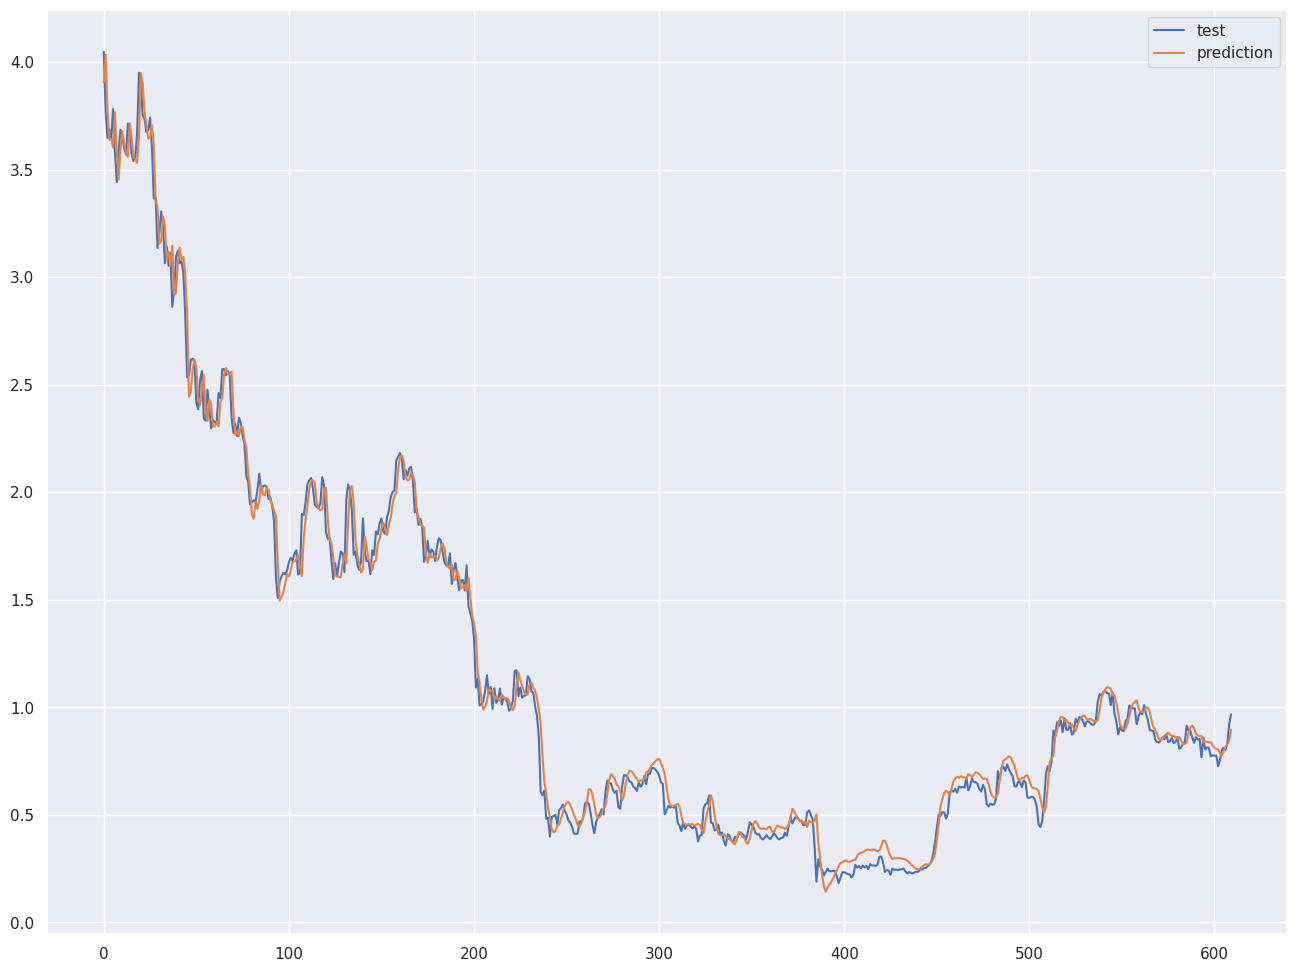

In [ ]:
sns.set_theme()
plt.figure(figsize=(16, 12))
plt.plot(ytest, label="test")
plt.plot(predictions, label="prediction")
plt.legend()

In [ ]:
samples = len(xtest)
samples

610

In [ ]:
%matplotlib inline
from IPython import display
import time

st = StreamingData(train, test, validation, 1)

for i in range(int(samples/2)):
    (xtrain, ytrain), (xtest, ytest) = st()

    tf.keras.backend.clear_session()
    inp = Input(shape=(xtrain.shape[1], xtrain.shape[2]))
    x = LSTM(32, activation="tanh", return_sequences=True)(inp)
    x = LSTM(32, activation="tanh", return_sequences=False)(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1)(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss=MeanSquaredError(),
                optimizer=Adam(),
                metrics=[MeanAbsoluteError()])
    history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xtest, ytest), verbose=0)

    plt.figure(figsize=(16, 12))
    plt.plot(ytest, label="test")
    plt.plot(model.predict(xtest), label="prediction")
    plt.legend()
    plt.show()

    time.sleep(8.0)
    display.clear_output(wait=True)
    display.display(plt.gcf())


<Figure size 640x480 with 0 Axes>

# classification fashion_mnist dataset

In [56]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [57]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [58]:
print(f"x_train shape is {x_train.shape}\n y_train shape is {y_train.shape}")

x_train shape is (60000, 28, 28)
 y_train shape is (60000,)


In [59]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

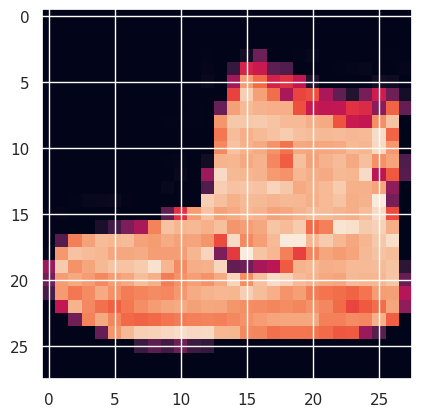

In [60]:
plt.imshow(x_train[0])

In [61]:
x_train, y_train = x_train.reshape(-1, 28, 28, 1), y_train.reshape(-1, 1)

In [62]:
x_test, y_test = x_test.reshape(-1, 28, 28, 1), y_test.reshape(-1, 1)

In [63]:
x_train, x_add, y_train, y_add = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [64]:
y_train.shape

(48000, 1)

In [65]:
class OnlineMachineLearning:
  def __init__(self, initial_x, initial_y, input_shape, x_test, y_test):
    self.X = initial_x
    self.y = initial_y
    self.input_shape = input_shape

  def preprocess(self, X, y):
    self.encoder = OneHotEncoder()
    self.encoder.fit(y)
    y = self.encoder.transform(y)

    X = X.astype("float32") / 255.
    return X, y.toarray()

  def creat_model(self, input_shape):
    inp = Input(shape=input_shape)
    conv = Conv2D(64, (3, 3), activation="relu")(inp)
    pool = MaxPooling2D(2, 2)(conv)
    flat = Flatten()(pool)
    dense = Dense(64, activation="relu")(flat)
    classifier = Dense(10, activation="softmax")(dense)

    model = tf.keras.models.Model(inputs=inp, outputs=classifier)
    model.compile(loss=CategoricalCrossentropy(),
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

  def learn(self, model, X, y, epochs):
    history = model.fit(X, y, epochs=epochs)
    return history

  def evaluation(self, X_test, y_test, model, epochs, hist):
    loss_val, accuracy_val = model.evaluate(X_test, y_test)
    loss, accuracy = hist.history["loss"], hist.history["accuracy"]

    conf_matrix = confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    ax[0, 0].plot(np.arange(epochs), loss, label="loss")
    ax[0, 0].legend()

    ax[0, 1].plot(np.arange(epochs), accuracy, label="accuracy")
    ax[0, 1].legend()

    sns.heatmap(conf_matrix, label="confusion_matrix", annot=True, ax=ax[1, 0])
    ax[1, 0].legend()
    plt.show()

    print(f"accuracy on test set is {accuracy_val} and loss is {loss_val}")




In [66]:
oml = OnlineMachineLearning(x_train, y_train, (x_train.shape[1], x_train.shape[2], 1), x_test, y_test)
x_tr, y_tr = oml.preprocess(x_train, y_train)
x_te, y_te = oml.preprocess(x_test, y_test)
model = oml.creat_model(oml.input_shape)
hist = oml.learn(model, x_tr, y_tr, 10)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4285 - accuracy: 0.8486
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2902 - accuracy: 0.8960
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2462 - accuracy: 0.9104
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2160 - accuracy: 0.9202
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1922 - accuracy: 0.9299
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1688 - accuracy: 0.9387
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1482 - accuracy: 0.9450
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1287 - accuracy: 0.9526
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1152 - accuracy: 0.9576
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0

313/313 [==============================] - 1s 3ms/step


<ipython-input-65-86acb281512e>:46: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1, 0].legend()


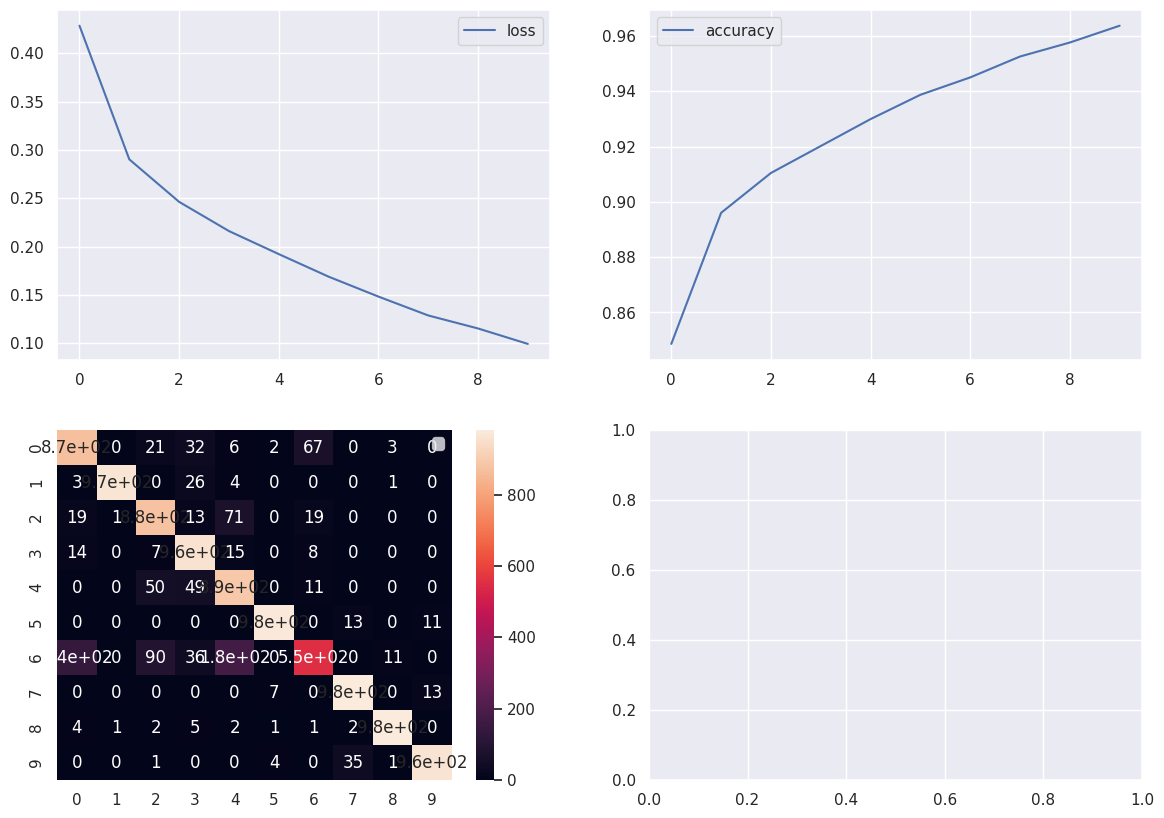

accuracy on test set is 0.900600016117096 and loss is 0.34467631578445435


In [67]:
oml.evaluation(x_te, y_te, model, 10, hist)

Epoch 1/10
1501/1501 [==============================] - 9s 5ms/step - loss: 0.4165 - accuracy: 0.8506
Epoch 2/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.2789 - accuracy: 0.8993
Epoch 3/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.2310 - accuracy: 0.9153
Epoch 4/10
1501/1501 [==============================] - 5s 4ms/step - loss: 0.2007 - accuracy: 0.9254
Epoch 5/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1729 - accuracy: 0.9366
Epoch 6/10
1501/1501 [==============================] - 9s 6ms/step - loss: 0.1511 - accuracy: 0.9442
Epoch 7/10
1501/1501 [==============================] - 5s 4ms/step - loss: 0.1284 - accuracy: 0.9526
Epoch 8/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1106 - accuracy: 0.9600
Epoch 9/10
1501/1501 [==============================] - 8s 6ms/step - loss: 0.0958 - accuracy: 0.9649
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


<ipython-input-65-86acb281512e>:46: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1, 0].legend()


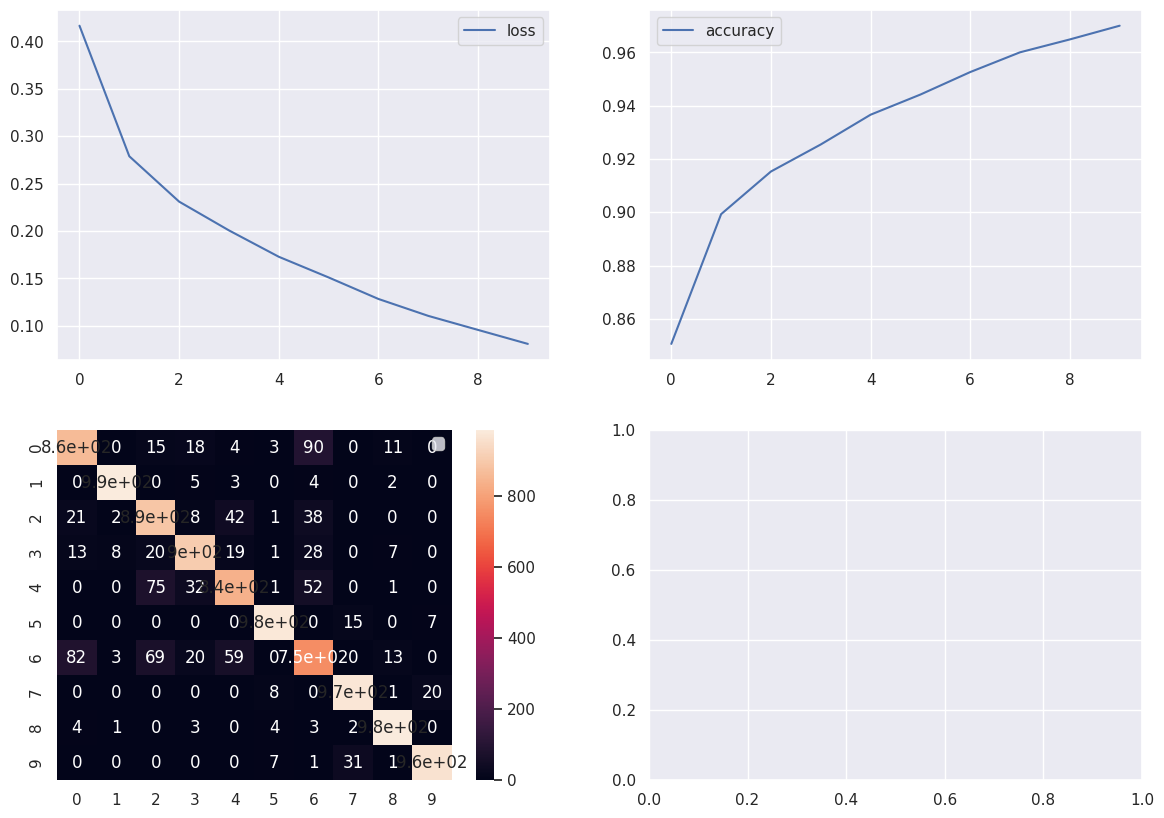

accuracy on test set is 0.9121999740600586 and loss is 0.31163954734802246
Epoch 1/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.4129 - accuracy: 0.8553
Epoch 2/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.2786 - accuracy: 0.9007
Epoch 3/10
1501/1501 [==============================] - 5s 4ms/step - loss: 0.2319 - accuracy: 0.9155
Epoch 4/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.2006 - accuracy: 0.9269
Epoch 5/10
1501/1501 [==============================] - 9s 6ms/step - loss: 0.1765 - accuracy: 0.9345
Epoch 6/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1515 - accuracy: 0.9435
Epoch 7/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1291 - accuracy: 0.9529
Epoch 8/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1108 - accuracy: 0.9588
Epoch 9/10
1501/1501 [==============================] - 7s 4ms/step - loss: 0.0946 - accuracy: 0.9649
Epoch 1

<ipython-input-65-86acb281512e>:46: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1, 0].legend()


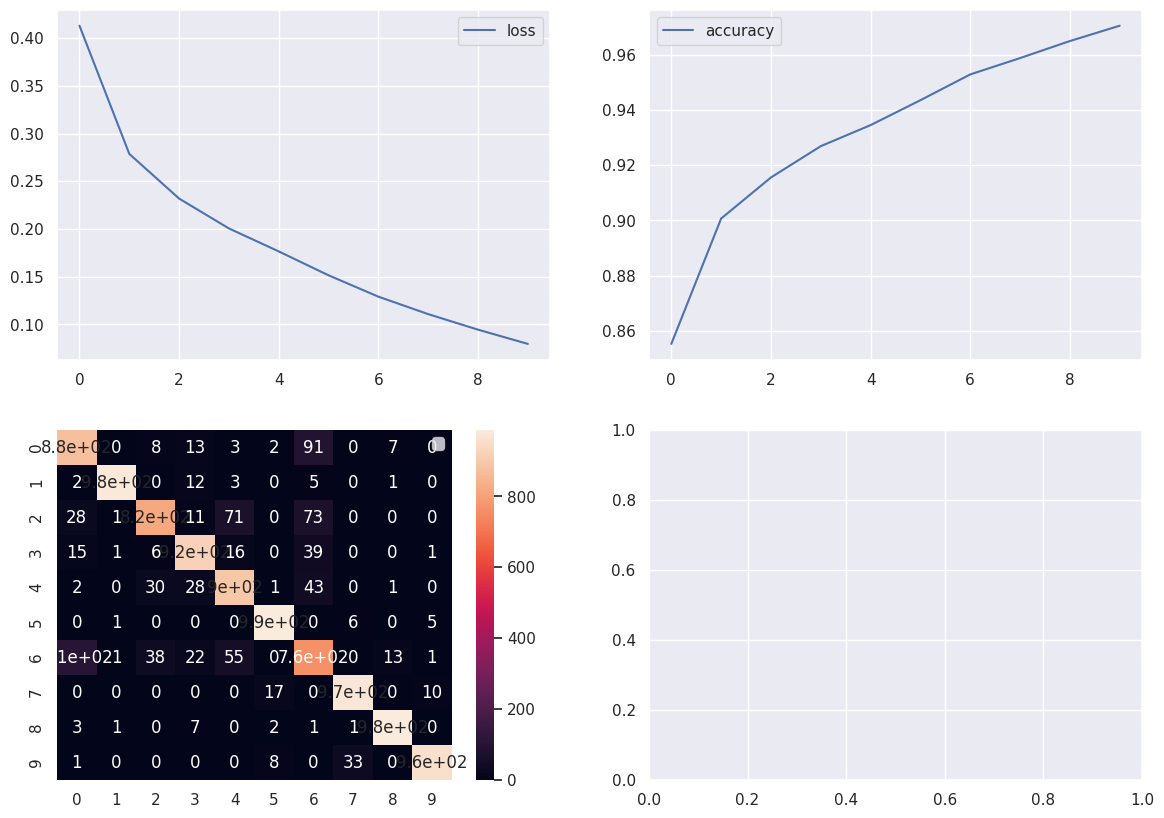

accuracy on test set is 0.9153000116348267 and loss is 0.31831836700439453
Epoch 1/10
1501/1501 [==============================] - 8s 4ms/step - loss: 0.4208 - accuracy: 0.8521
Epoch 2/10
1501/1501 [==============================] - 9s 6ms/step - loss: 0.2831 - accuracy: 0.8978
Epoch 3/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.2394 - accuracy: 0.9130
Epoch 4/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.2087 - accuracy: 0.9238
Epoch 5/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1834 - accuracy: 0.9337
Epoch 6/10
1501/1501 [==============================] - 7s 4ms/step - loss: 0.1595 - accuracy: 0.9416
Epoch 7/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1383 - accuracy: 0.9486
Epoch 8/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1233 - accuracy: 0.9543
Epoch 9/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.1065 - accuracy: 0.9596
Epoch 1

<ipython-input-65-86acb281512e>:46: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1, 0].legend()


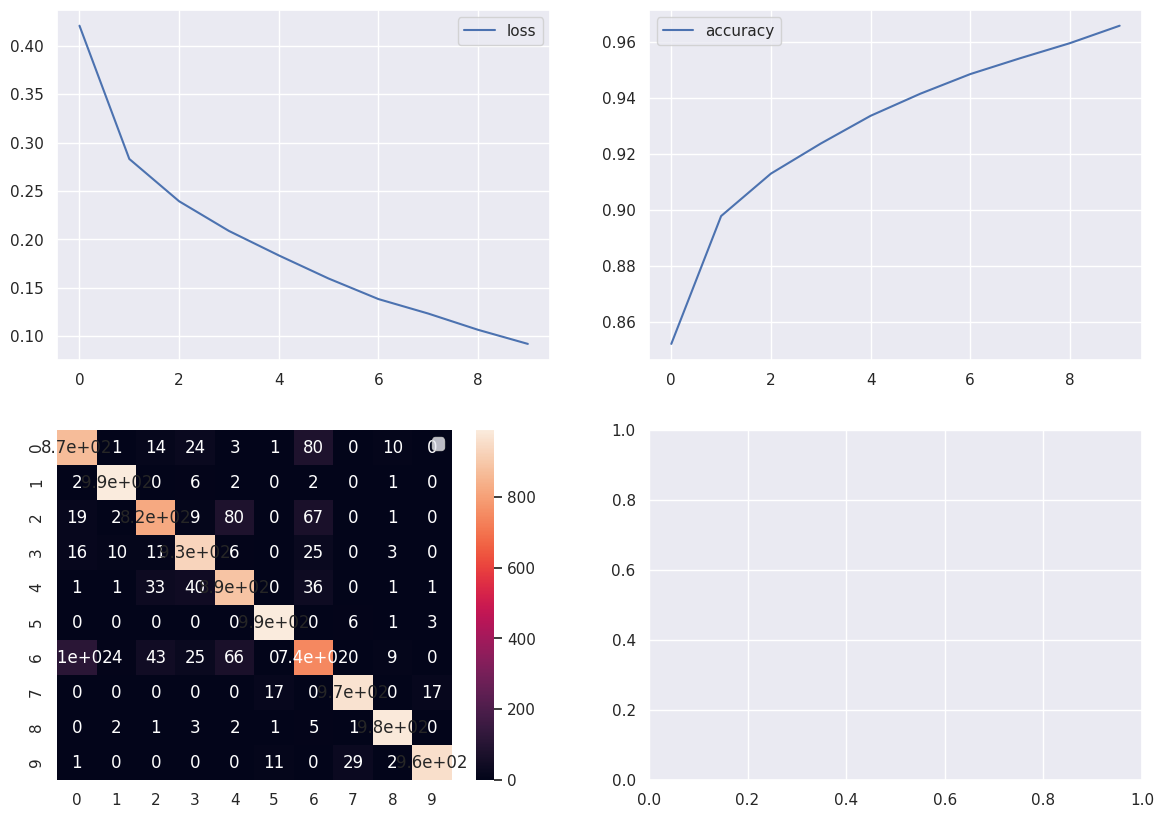

accuracy on test set is 0.9132999777793884 and loss is 0.3078635632991791
Epoch 1/10
1501/1501 [==============================] - 10s 6ms/step - loss: 0.4083 - accuracy: 0.8568
Epoch 2/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.2778 - accuracy: 0.8996
Epoch 3/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.2299 - accuracy: 0.9151
Epoch 4/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1977 - accuracy: 0.9278
Epoch 5/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1723 - accuracy: 0.9366
Epoch 6/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1497 - accuracy: 0.9442
Epoch 7/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1301 - accuracy: 0.9522
Epoch 8/10
1501/1501 [==============================] - 7s 4ms/step - loss: 0.1111 - accuracy: 0.9595
Epoch 9/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.0958 - accuracy: 0.9644
Epoch 1

<ipython-input-65-86acb281512e>:46: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[1, 0].legend()


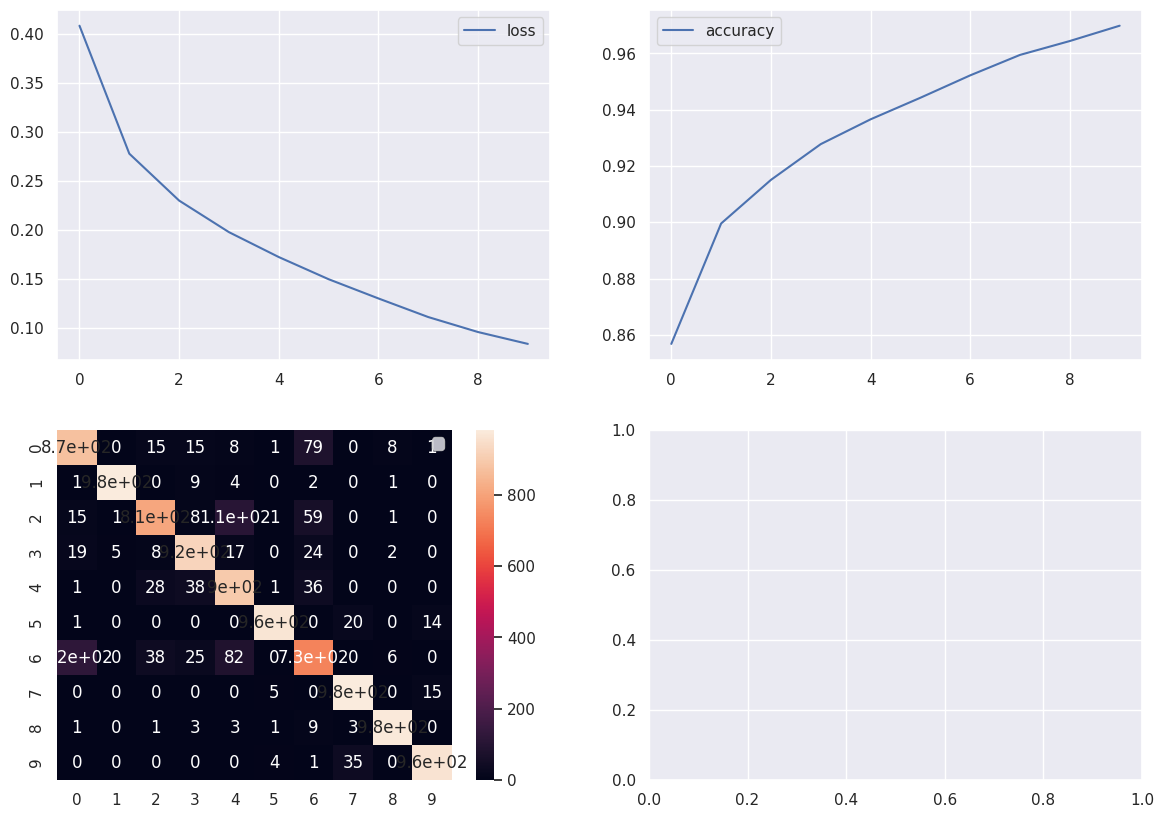

accuracy on test set is 0.9096999764442444 and loss is 0.33824196457862854
Epoch 1/10
1501/1501 [==============================] - 10s 5ms/step - loss: 0.4090 - accuracy: 0.8552
Epoch 2/10
1501/1501 [==============================] - 8s 6ms/step - loss: 0.2808 - accuracy: 0.8992
Epoch 3/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.2373 - accuracy: 0.9127
Epoch 4/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.2028 - accuracy: 0.9247
Epoch 5/10
1501/1501 [==============================] - 8s 6ms/step - loss: 0.1766 - accuracy: 0.9354
Epoch 6/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.1520 - accuracy: 0.9445
Epoch 7/10
1501/1501 [==============================] - 6s 4ms/step - loss: 0.1317 - accuracy: 0.9519
Epoch 8/10
1501/1501 [==============================] - 8s 5ms/step - loss: 0.1147 - accuracy: 0.9570
Epoch 9/10
1501/1501 [==============================] - 7s 5ms/step - loss: 0.0985 - accuracy: 0.9640
Epoch 

In [ ]:
for i in range(x_add.shape[0]):
  x_train = np.concatenate([x_train, x_add[i].reshape(-1, 28, 28, 1)])
  y_train = np.concatenate([y_train, y_add[i].reshape(-1, 1)])
  oml = OnlineMachineLearning(x_train, y_train, (x_train.shape[1], x_train.shape[2], 1), x_test, y_test)
  x_tr, y_tr = oml.preprocess(x_train, y_train)
  x_te, y_te = oml.preprocess(x_test, y_test)
  model = oml.creat_model(oml.input_shape)
  hist = oml.learn(model, x_tr, y_tr, 10)
  oml.evaluation(x_te, y_te, model, 10, hist)